In [1]:
#get my things

import pandas as pd
import os
import matplotlib.pyplot as plt
from pprint import pprint
import numpy as np
import scipy as sci
from scipy.stats import linregress
import scipy.stats as stats

In [2]:
#paths to the data we downloaded

comb_path = os.path.join("comb_Tcopy.csv")
raw_path = os.path.join("gps_Tcopy.csv")
review_path = os.path.join("gps_reviews_Tcopy.csv")

In [36]:
#Make a dataframe from the full combined data Dave created

comb_df = pd.read_csv(comb_path, low_memory=False)
comb_df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
0,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up,A kid's excessive ads. The types ads allowed a...,Negative,-0.250,1.000000
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up,It bad >:(,Negative,-0.725,0.833333
2,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up,like,Neutral,0.000,0.000000
3,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up,NaN,NaN,NaN,NaN
4,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up,I love colors inspyering,Positive,0.500,0.600000


In [38]:
comb_df2 = comb_df.copy()
comb_df2 = comb_df2.dropna()
comb_df2

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
0,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up,A kid's excessive ads. The types ads allowed a...,Negative,-0.250000,1.000000
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up,It bad >:(,Negative,-0.725000,0.833333
2,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up,like,Neutral,0.000000,0.000000
4,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up,I love colors inspyering,Positive,0.500000,0.600000
5,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up,I hate,Negative,-0.800000,0.900000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
122646,A+ Gallery - Photos & Videos,PHOTOGRAPHY,4.5,223941,Varies with device,"10,000,000+",Free,0,Everyone,Photography,"August 6, 2018",Varies with device,Varies with device,Overall great app. Best gallery seen far,Positive,0.475000,0.512500
122652,A+ Gallery - Photos & Videos,PHOTOGRAPHY,4.5,223941,Varies with device,"10,000,000+",Free,0,Everyone,Photography,"August 6, 2018",Varies with device,Varies with device,"Recommended, 100% love it, keep good work dev ...",Positive,0.566667,0.733333
122659,A+ Gallery - Photos & Videos,PHOTOGRAPHY,4.5,223941,Varies with device,"10,000,000+",Free,0,Everyone,Photography,"August 6, 2018",Varies with device,Varies with device,Too much ads,Positive,0.200000,0.200000
122660,A+ Gallery - Photos & Videos,PHOTOGRAPHY,4.5,223941,Varies with device,"10,000,000+",Free,0,Everyone,Photography,"August 6, 2018",Varies with device,Varies with device,Just allow time ...,Neutral,0.000000,0.000000


In [44]:
comb_df2 = comb_df2.loc[:, ['App', 'Type', 'Price', 'Sentiment_Polarity']]
comb_df2

,App,Type,Price,Sentiment_Polarity
0,Coloring book moana,Free,0,-0.250000
1,Coloring book moana,Free,0,-0.725000
2,Coloring book moana,Free,0,0.000000
4,Coloring book moana,Free,0,0.500000
5,Coloring book moana,Free,0,-0.800000
...,...,...,...,...
122646,A+ Gallery - Photos & Videos,Free,0,0.475000
122652,A+ Gallery - Photos & Videos,Free,0,0.566667
122659,A+ Gallery - Photos & Videos,Free,0,0.200000
122660,A+ Gallery - Photos & Videos,Free,0,0.000000


In [21]:
#I want to narrow down my columns to focus on sentiment and price to see their relationship
#also needed to drop out rows that did not contain actual reviews in them (drop Na)
#had to remove the $ so 'price' could be an integer so it could be worked with and then added it back later for appearances
#used the groupby on 'app' to count the number of reviews (it counted 'type' to be specific but that was an intentional
#     useless column just so it could be counted) and it took an average of the Polarity scores

sentiment_df = comb_df.loc[:, ['App', 'Type', 'Price', 'Sentiment_Polarity']]
sentiment_df = sentiment_df.dropna()
sentiment_df['Price'] = sentiment_df['Price'].str.replace('$', '')
sentiment_df['Price'] = sentiment_df['Price'].astype('float')
sent_plot_df = sentiment_df.copy()
sentiment_df = sentiment_df.groupby(['App'], as_index=False).agg({'Type' : 'count', 'Price' : 'mean', 'Sentiment_Polarity' : 'mean'})
sentiment_df = sentiment_df.rename(columns={'Type': 'Number of Reviews'})
sentiment_df = sentiment_df.rename(columns={'Sentiment_Polarity': "Average Sentiment Polarity"})
sentiment_df['Price'] = sentiment_df['Price'].map('${:,.2f}'.format)

sentiment_df

,App,Number of Reviews,Price,Average Sentiment Polarity
0,10 Best Foods for You,388,$0.00,0.470733
1,11st,40,$0.00,0.181294
2,1800 Contacts - Lens Store,160,$0.00,0.318145
3,1LINE – One Line with One Touch,38,$0.00,0.196290
4,2018Emoji Keyboard 😂 Emoticons Lite -sticker&gif,32,$0.00,0.449566
...,...,...,...,...
811,Hotels.com: Book Hotel Rooms & Find Vacation D...,136,$0.00,0.101622
812,Hotspot Shield Free VPN Proxy & Wi-Fi Security,34,$0.00,0.251765
813,Hotstar,32,$0.00,0.038178
814,Hotwire Hotel & Car Rental App,33,$0.00,0.187029


In [22]:
#output that table to a csv plz

sentiment_df.to_csv('Outputs/Price-Sentiment_table.csv', index=False)

In [32]:
sentiment_df[sentiment_df['Price'] != '$0.00']

,App,Number of Reviews,Price,Average Sentiment Polarity,Expected Avg SP
157,BIG Launcher,40,$9.99,0.184987,0.16
197,Beautiful Widgets Pro,74,$2.49,0.179418,0.16
293,Call of Duty:Black Ops Zombies,3,$6.99,-0.162120,NaN
418,Diabetes & Diet Tracker,148,$9.99,0.363627,0.16
448,Dr. Panda & Toto's Treehouse,216,$3.99,0.180237,0.16
494,Essential Anatomy 3,160,$11.99,0.225516,0.16
548,Farming Simulator 18,39,$4.99,0.064467,NaN
692,Golfshot Plus: Golf GPS,40,$29.99,0.386179,0.16
735,HD Widgets,62,$0.99,0.181818,0.16


The r-squared is: 0.028082320054840803


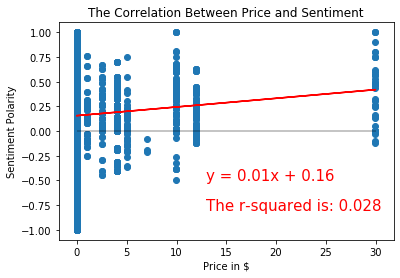

In [45]:
#in the middle of the last cell i copied the data back while 'price' was still in integer so i could use it in the scatterplot
#and then i made a scatterplot with line across 0 Polarity to more easily see positive and negative scores

plt.hlines(0, 0, 30, alpha=0.3)
plt.title("The Correlation Between Price and Sentiment")
plt.xlabel("Price in $")
plt.ylabel("Sentiment Polarity")

x_values = sent_plot_df['Price']
y_values = sent_plot_df['Sentiment_Polarity']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(13,-0.5),fontsize=15,color="red")
plt.annotate(f"The r-squared is: {round(rvalue, 3)}",(13, -0.8),fontsize=15,color='red')
print(f"The r-squared is: {rvalue}")

plt.show

#the below line creates a .png of the plot and i have #-ed it out so i don't keep making new .png's every time i run this
#plt.savefig('Outputs/Price-Sentiment_scatter.png')